In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
dataset_cols = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value", "ocean_proximity_<1H OCEAN", "ocean_proximity_INLAND", "ocean_proximity_ISLAND", "ocean_proximity_NEAR BAY", "ocean_proximity_NEAR OCEAN"]
df = pd.read_csv("housing.csv")

In [ ]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=False, dtype=int)
df.dropna(subset=['total_bedrooms'], inplace=True)

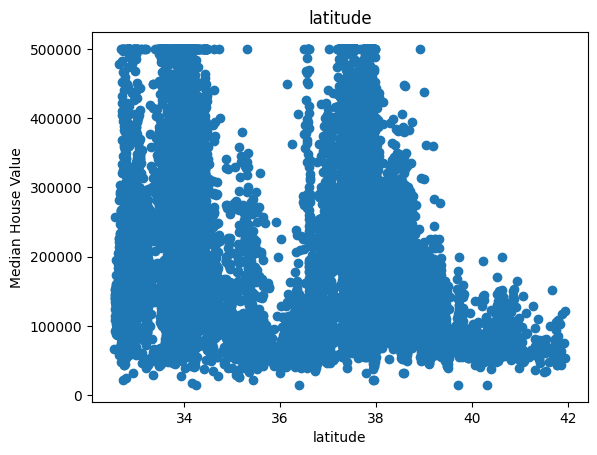

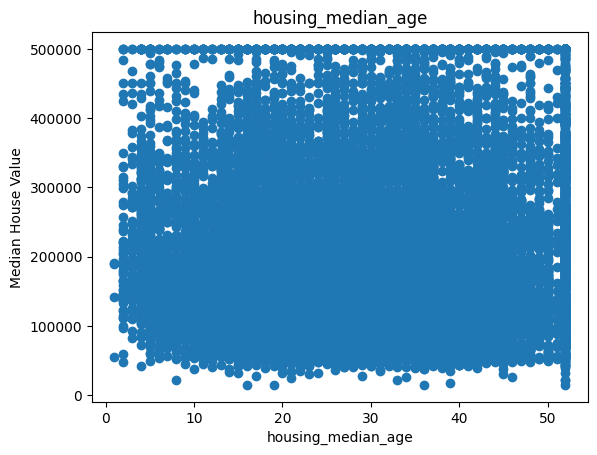

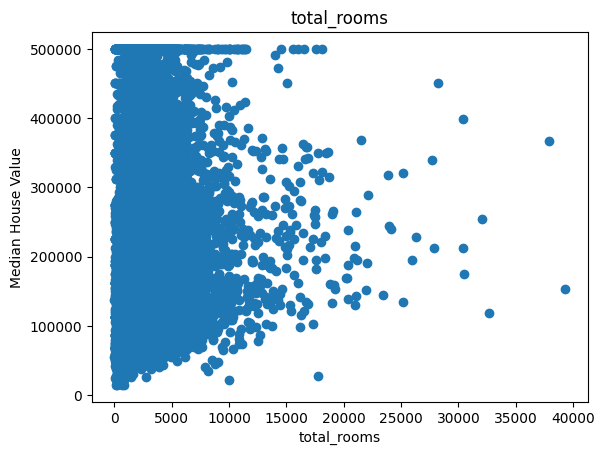

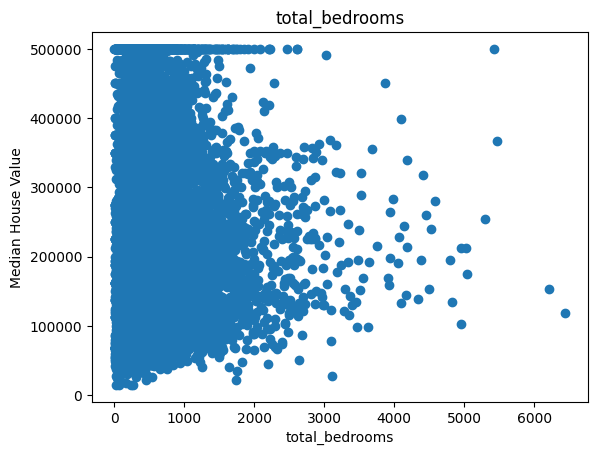

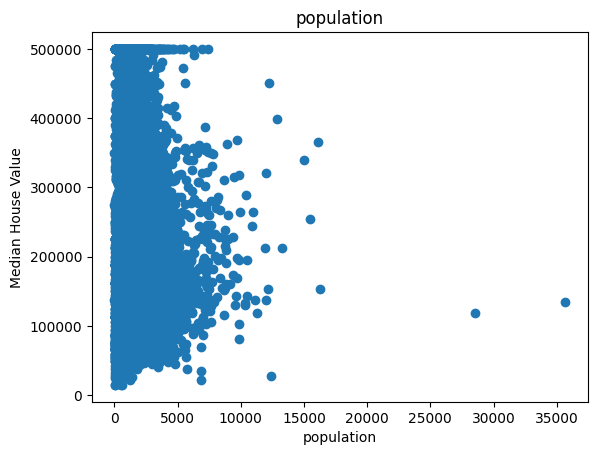

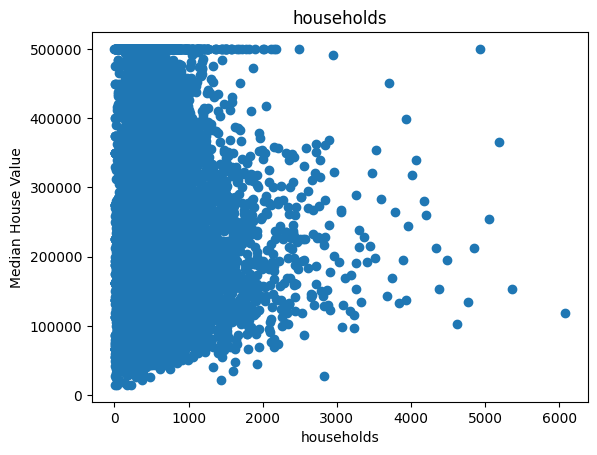

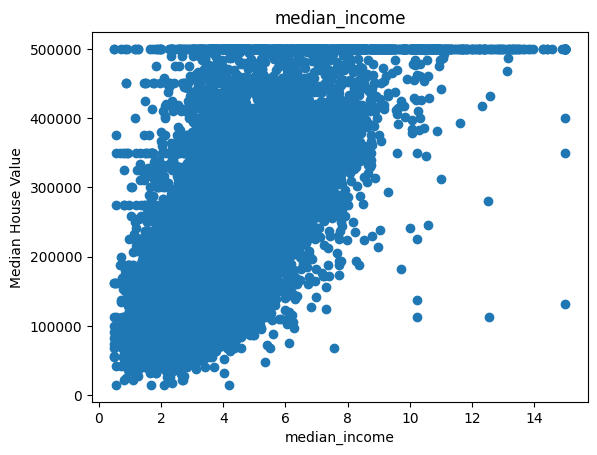

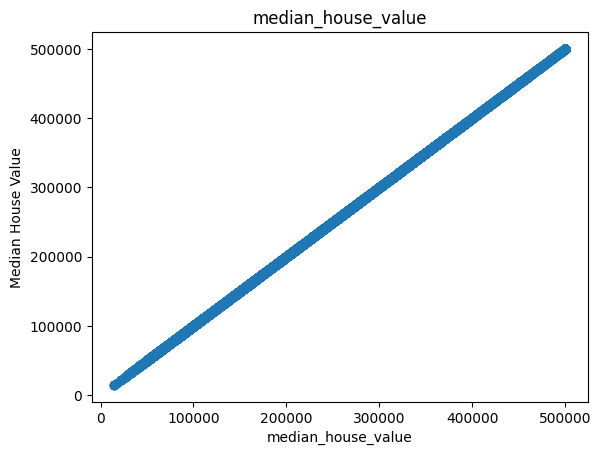

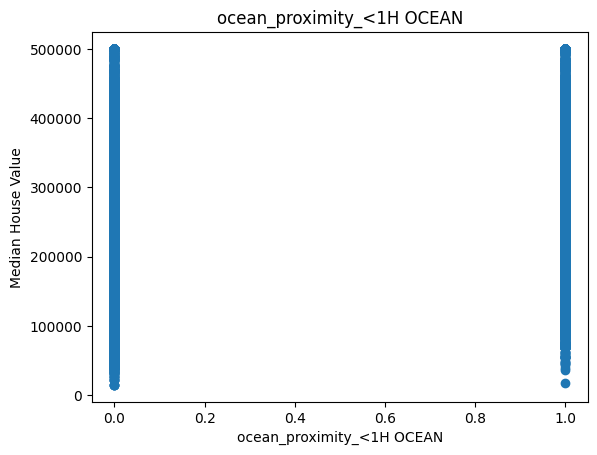

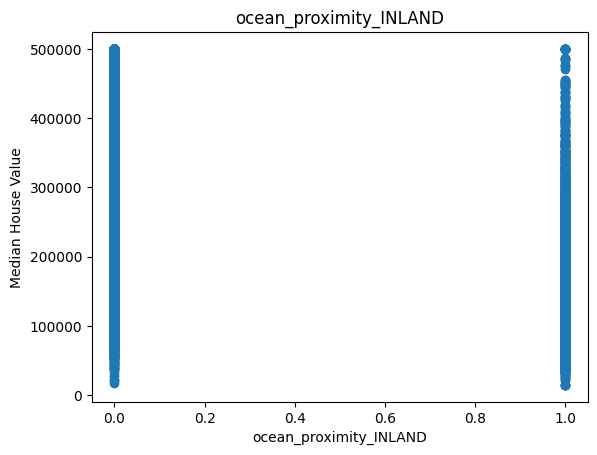

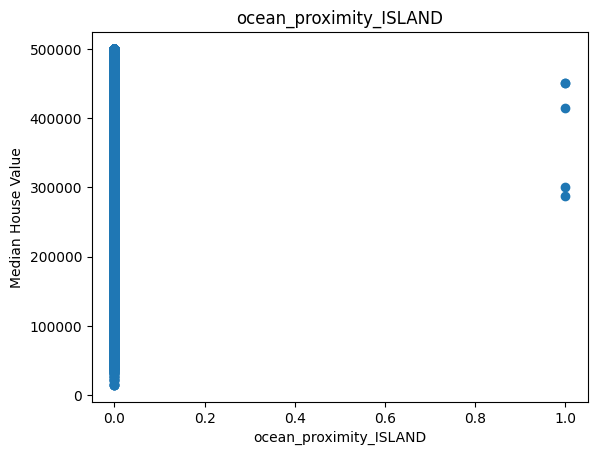

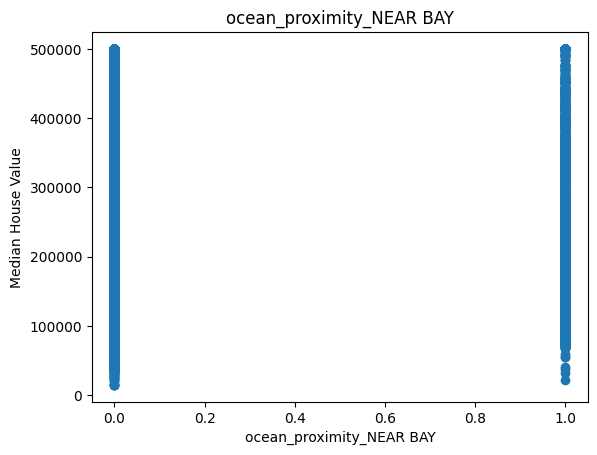

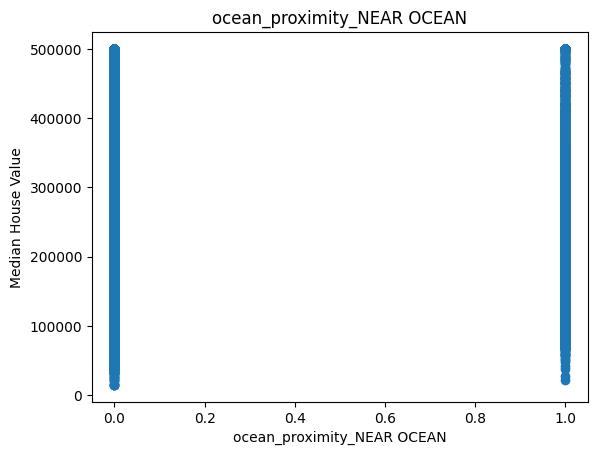

In [ ]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["median_house_value"])
  plt.title(label)
  plt.ylabel("Median House Value")
  plt.xlabel(label)
  plt.show()

#Scale Dataset

In [ ]:
def scale_dataset(dataframe):
  X = dataframe[[col for col in df.columns if col != "median_house_value"]].values
  y = dataframe["median_house_value"].values.reshape(-1, 1)

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  return X, y

In [ ]:
X_train, y_train = scale_dataset(train)
X_val, y_val = scale_dataset(val)
X_test, y_test = scale_dataset(test)

#Train/val/test datasets

In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


#Single Linear Regression

In [ ]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y

In [ ]:
_, X_train_income, y_train_income = get_xy(train, "median_house_value", x_labels=["median_income"])
_, X_val_income, y_val_income = get_xy(val, "median_house_value", x_labels=["median_income"])
_, X_test_income, y_test_income = get_xy(test, "median_house_value", x_labels=["median_income"])

In [ ]:
income_reg = LinearRegression()
income_reg.fit(X_train_income, y_train_income)

LinearRegression()

In [ ]:
income_reg.score(X_test_income, y_test_income)

0.465977705881194

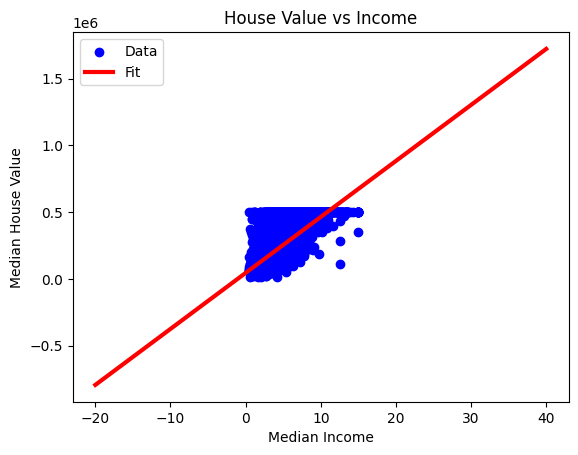

In [ ]:
plt.scatter(X_train_income, y_train_income, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, income_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("House Value vs Income")
plt.ylabel("Median House Value")
plt.xlabel("Median Income")
plt.show()

#Multiple Linear Regression

In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "median_house_value", x_labels=[col for col in df.columns if col != "median_house_value"])
_, X_val_all, y_val_all = get_xy(val, "median_house_value", x_labels=[col for col in df.columns if col != "median_house_value"])
_, X_test_all, y_test_all = get_xy(test, "median_house_value", x_labels=[col for col in df.columns if col != "median_house_value"])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [ ]:
all_reg.score(X_test_all, y_test_all)

0.647401925855535

### Evaluating Regression Model Performance with MAE, MSE, and RMSE

In [ ]:
y_pred_all = all_reg.predict(X_test_all)

mae = mean_absolute_error(y_test_all, y_pred_all)
mse = mean_squared_error(y_test_all, y_pred_all)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 49996.39
Mean Squared Error (MSE): 4668861520.90
Root Mean Squared Error (RMSE): 68329.07


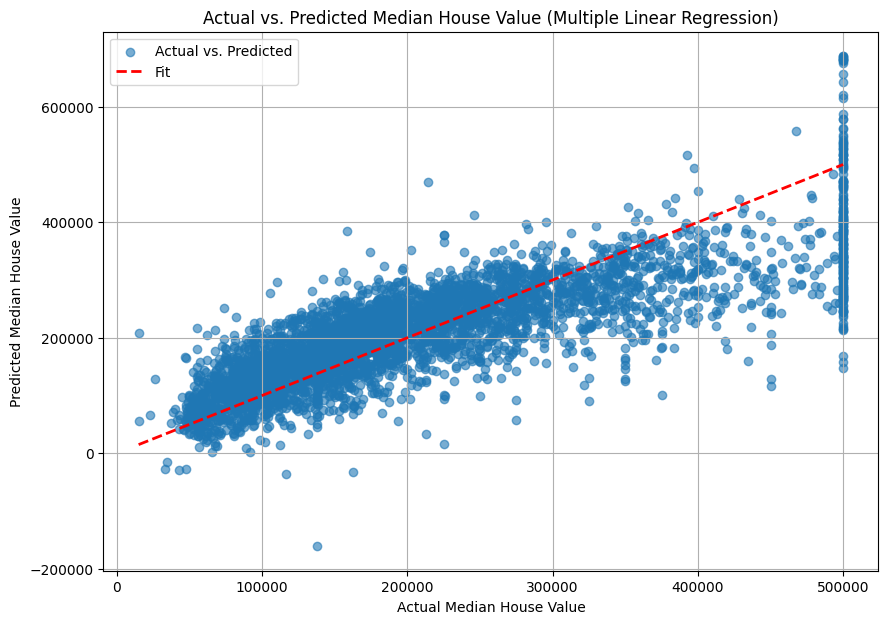

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(x=y_test_all.flatten(), y=y_pred_all.flatten(), alpha=0.6, label="Actual vs. Predicted")
plt.plot([y_test_all.min(), y_test_all.max()], [y_test_all.min(), y_test_all.max()], 'r--', lw=2, label="Fit")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted Median House Value (Multiple Linear Regression)")
plt.legend()
plt.grid(True)
plt.show()

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train.flatten())

RandomForestRegressor(random_state=42)

In [ ]:
rf_reg.score(X_test, y_test)

0.7831905071732005

In [ ]:
y_pred_rf = rf_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 36279.80
Mean Squared Error (MSE): 2846180093.07
Root Mean Squared Error (RMSE): 53349.60


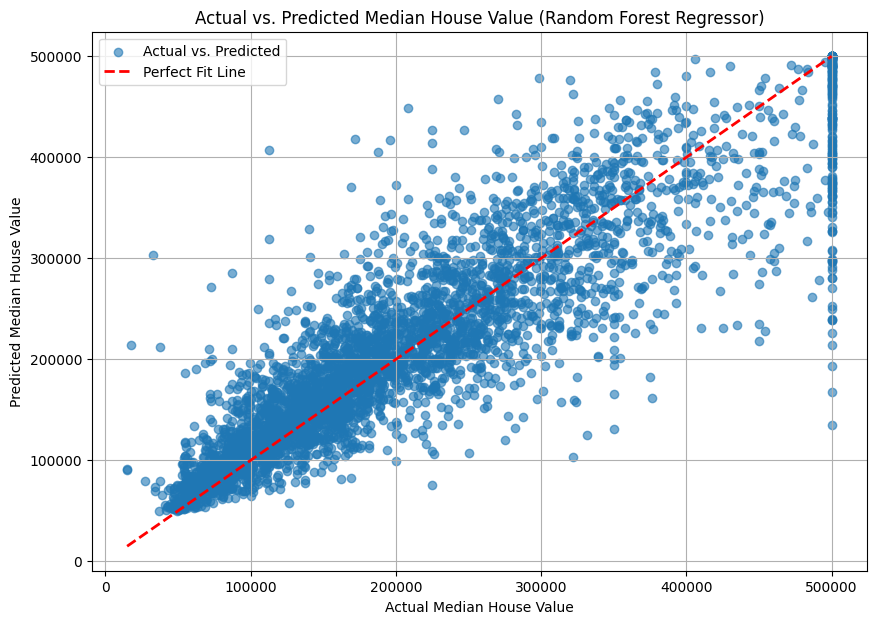

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(x=y_test.flatten(), y=y_pred_rf.flatten(), alpha=0.6, label="Actual vs. Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit Line")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted Median House Value (Random Forest Regressor)")
plt.legend()
plt.grid(True)
plt.show()